In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np

In [7]:
import warnings
warnings.filterwarnings('ignore')

X.shape: (26, 2)


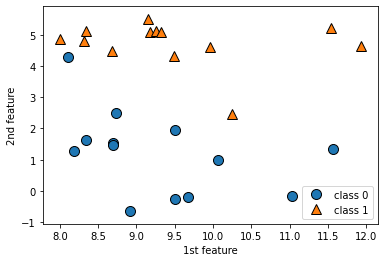

In [8]:
X,y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0' ,'class 1'],loc=4)
plt.xlabel('1st feature')
plt.ylabel('2nd feature')
print('X.shape:',X.shape)


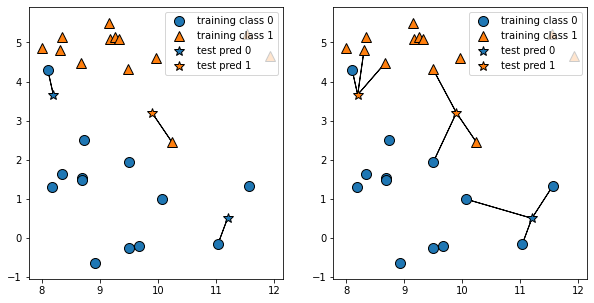

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
mglearn.plots.plot_knn_classification(n_neighbors=1)  # 가장 가까운 이웃 한개로 label 결정
plt.subplot(1,2,2)
mglearn.plots.plot_knn_classification(n_neighbors=3) # 최근접 이웃 중 다수의 클래스가 레이블 됨

### scikit-learn 사용

#### KNN classifier

In [12]:
#fit, predict ->  메서드 
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)  #이웃의 수 : 매개변수 지정
 
clf.fit(X_train,y_train) # 학습

print('Predict test data',clf.predict(X_test))

Predict test data [1 0 1 0 1 0 0]


In [13]:
#모델이 얼마나 잘 일반화되었는지 평가하기 위해  score메서드에 test data와 test label 입력 후 호출
print(f'accuracy:{clf.score(X_test,y_test):.2f}')
# 모델이 테스트 데이터셋에 있는 샘풀 중 86%를 정확히 예측

accuracy:0.86


#### KNeighbors Classifier 분석

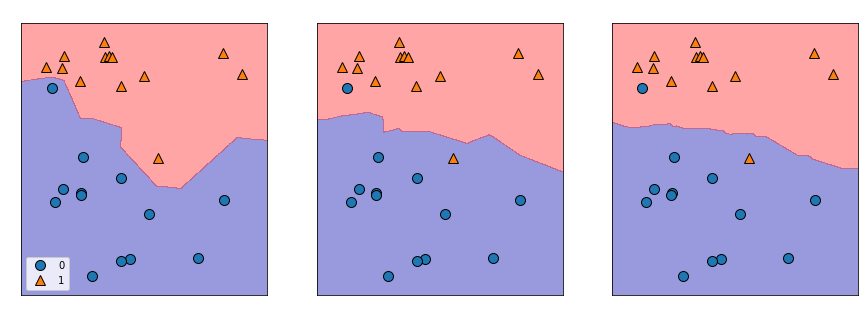

In [18]:
fig,axes = plt.subplots(1,3,figsize = (15,5))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    
    ax.set_title(f'{n_neighbors} neighbors', color = 'white')
    ax.set_xlabel('featrue0', color = 'white')
    ax.set_ylabel('feature1', color ='white' )
axes[0].legend(loc=3)

# 결정경계(decision boundary) 확인
# 이웃 수가 적을수록 결정경계가 훈련데이터에 가깝게 따라가고 있음
# 이웃 수가 늘어날 수록 경계가 부드러워짐 -> 모델이 단순해짐

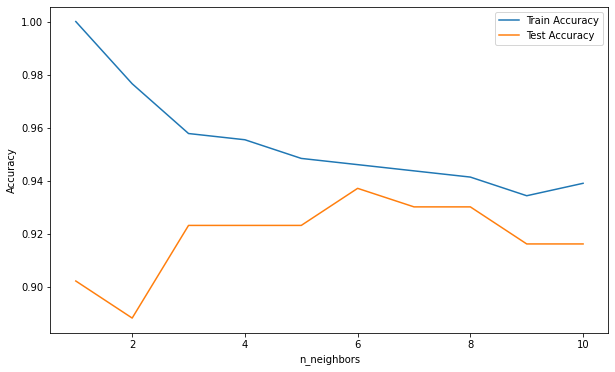

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train,y_train)) # 훈련 세트 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test)) # 일반화 정확도 저장

plt.figure(figsize=(10,6))   
plt.plot(neighbors_settings,training_accuracy, label='Train Accuracy')
plt.plot(neighbors_settings, test_accuracy,label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

#이웃 개수 너무 적으면 과대적합 , 너무 많으면 너무 단순해짐  -> 적정 이웃 수 : 6개 

#### K-NN Regression

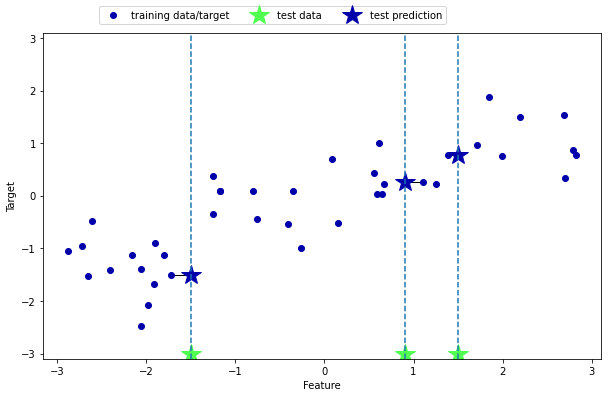

In [34]:
#plt.subplot(2,1,1)
mglearn.plots.plot_knn_regression(n_neighbors=1)  

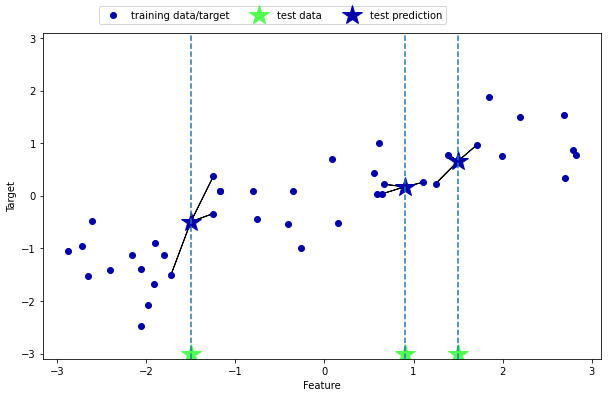

In [35]:
#plt.subplot(2,1,2)
mglearn.plots.plot_knn_regression(n_neighbors=3)

\begin{equation}
R2 = 1 - \frac{ sum_{i=1}^{N}(y_i - \hat{y}_i)^2}{ sum_{i=1}^{N}(y_i - \bar{y}_i)^2}
\end{equation}


In [37]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train,y_train)

print(f'Predict Test Data:\n{reg.predict(X_test)}\n')
print(f'R2 of Test Data:{reg.score(X_test,y_test):.2f}')

# 회귀에서 score값은 R2값임.
# R2:결정계수. 회귀 모델에서 예측의 적합도 나타냄. 0과1사이의 값. 값이 0이면 y_train의 평균으로만 예측하는 모델
# R2가 음수라면 예측과 타깃이 상반된 경향을 가진다는 뜻 

Predict Test Data:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

R2 of Test Data:0.83


#### KNeighborsRegressor 분석

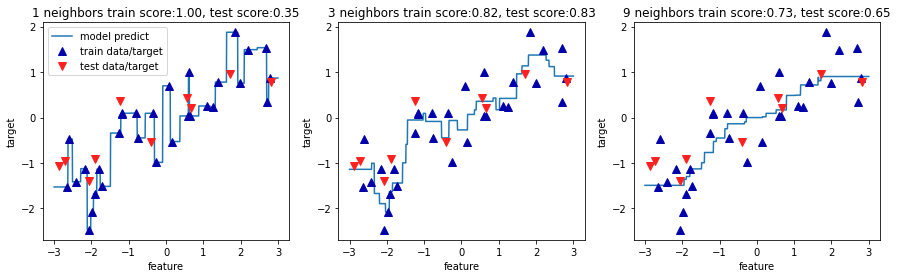

In [40]:
fig,axes = plt.subplots(1,3,figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^', c= mglearn.cm2(0),markersize = 8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
        f'{n_neighbors} neighbors train score:{reg.score(X_train,y_train):.2f}, test score:{reg.score(X_test,y_test):.2f}'
    )
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    
axes[0].legend(['model predict','train data/target','test data/target'],loc ='best')

### KNN 정리

- n_neighbors 매개변수 조정 주의해야함. (보통 3 or 5)  
- 거리 재는 방법은 주로 여러 환경에서 잘 작동하는 유클리디안 거리방식 사용

`장점`
- 이해하기 매우 쉬운모델
- 많이 조정하지 않아도 자주 좋은 성능 발휘
- 더 복잡한 알고리즘을 적용해보기 전에 시도해 볼 수 있는 좋은 시작점
- 보통은 매우 빠르게 예측 모델을 만들 수 있지만, 훈련 세트가 매우 크면(특성의 수나 샘플의 수가 클 경우) 예측이 느려짐. 

`단점`
- 예측이 느리고 많은 특성을 처리하는 능력이 부족해 협업에서는 잘 쓰지 않음. 
- 이러한 단점을 보완한 알고리즘이 선형 모델

`주의`
- KNN 알고리즘을 사용할 때는 데이터 전처리 과정이 중요.
- 수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않으며, 특성 값 대부분이 0인(즉 희소한) 데이터셋과는 특히 잘 작동하지 않음